In [103]:
import feyn

ql = feyn.QLattice(random_seed=42)

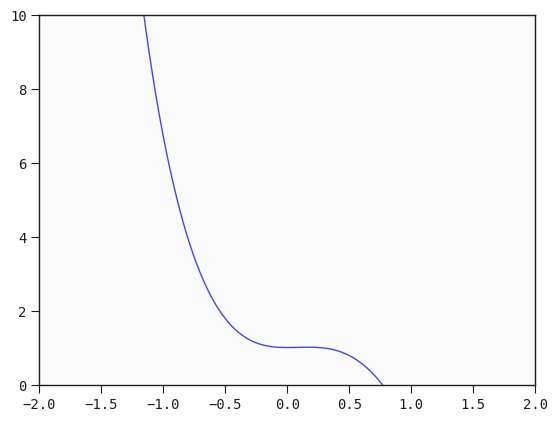

In [104]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1.5, 1.5, 1000)
y = np.exp(X**2) - 4*X**3

plt.plot(X, y, linewidth=1)
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

In [105]:
import pandas as pd

data = np.c_[X, y]
data = pd.DataFrame(data, columns=["x", "y"])

In [106]:
data

,x,y
0,-1.500000,22.987736
1,-1.496997,22.821811
2,-1.493994,22.657139
3,-1.490991,22.493709
4,-1.487988,22.331509
...,...,...
995,1.487988,-4.025023
996,1.490991,-4.022720
997,1.493994,-4.019834
998,1.496997,-4.016352


In [107]:
models = ql.auto_run(data, output_name='y')

In [108]:
for model in models:
    sympy_model = model.sympify(signif=3)
    display(sympy_model.as_expr())

-13.3*(0.168 - 0.854*x)*(-0.938*x - 0.0933)*(0.33*x - 0.651)*(-0.895*x - 0.751 + exp(-0.465*(0.48 - x)**2)) + 0.993

20.0*(1.22 - 0.775*x)*exp(-1.37*(0.481*x + 1)**2*(0.868*x - 1)**2 - 2.0*tanh((-0.721*x - 1.16)*(0.231*x + 0.241))**2) - 4.4

-26.6*(1.19*x + 1.56)*(-0.121*x + exp(-2.0*exp(-0.498*(1 - 0.622*x)**2 - 2.02*(x - 0.298)**2) - 2.0*tanh(1.13*x + 1.91)**2) + 0.271) + 14.8

66.0*exp(-1.44*(0.446*x + 1)**2 - 1.17*(0.453*x + 1)**2*(x - 0.943)**2) - 4.62

-4.67 - 42.3*exp(-1.06*(-0.465*x - 1)**2*(x - 0.874)**2 - 0.994*(0.447*x + 1)**2)/(-0.298*x - 1.24)

20.5*(1 - 0.542*x)**2*exp(-1.19e-9*(-0.738*x - 1)**2 - 2.0*exp(-0.296*(0.68 - x)**2*(0.527*x + 1)**2 - 0.936*(-x - 0.604)**2)) - 5.0

68.0*exp(-3.57*(1 - 0.794*x)**2*tanh(0.317*x + 0.703)**2 - 0.957*(-0.641*x - 1)**2) - 6.02

53.0*exp(-1.26*(-0.481*x - 1)**2 - 4.29*(0.487*x + 1)**2*(-0.421*x + 0.0249 + 1/(0.495*x + 2.2))**2) - 4.71

77.6*exp(-0.63*(0.862*x + 1)**2 - 2.0*exp(-0.606*(-x - 0.546)**2 - 4.0*tanh(exp(-6.9*(-0.368*x - 1)**2))**2)) - 6.79

49.5*exp(-0.371*(0.179 - x)**2*(0.655*x + 1)**2 - 3.13*(0.15*x - 1 + 0.18*exp(-0.991*x))**2) - 5.01

In [109]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

sympy_model = models[0].sympify(signif=3)
x_symbol = smp.symbols("x")

f = lambdify([x_symbol], sympy_model)

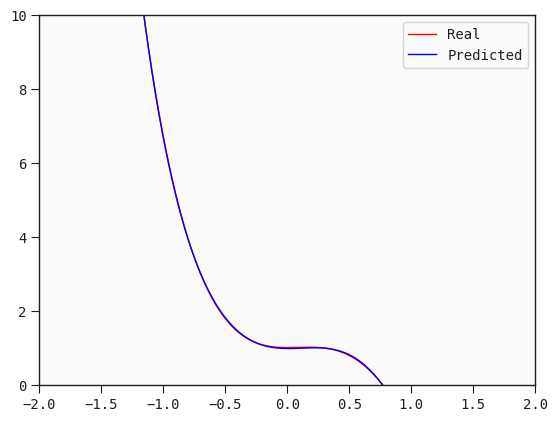

In [110]:
y_model = f(X)

plt.plot(X, y, linewidth=1, label="Real", c="red")
plt.plot(X, y_model, linewidth=1, c="blue", label="Predicted")
plt.legend()
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()